In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer

In [4]:
df = pd.read_csv("/mnt/d/public_projects/diwali_sales_analysis/Diwali_Sales_Data.csv",encoding='unicode_escape')

In [5]:
# this is used to show all the columns from the dataframe 
pd.set_option('display.max_columns', None)

In [6]:
# this is used to show all the rows present in the column dataframe 
pd.set_option('display.max_rows', None)

>Understanding the dataset <br>

1 . **Get a high-level overview of the dataset.** <br>
2 . **Check the first few rows using df.head().** <br>
3 . **Get information about data types and missing values with df.info() and df.describe()**

In [7]:
# this data is related to diwali sales which shows the sales information according to Gender, Age Group , Martial Status,State etc.
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
# this shows we have 3 float columns, 4 integer columns and 8 object or categorical columns
# have two columns in which we have zero data so we have to remove those columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# droped two columns from the dataframe which have zero data in their column 
df.drop(columns = ["Status","unnamed1"],inplace = True)

**We fill the nan values with the help of KNNImputer which fills the places according to data present **

In [10]:
x_df = df.select_dtypes(include=['int64',"float64"])

In [11]:
imuter = KNNImputer(n_neighbors=5)
x_df_values = imuter.fit_transform(x_df)
new_df = pd.DataFrame(x_df_values,columns = x_df.columns)

In [12]:
df["Amount"] = new_df["Amount"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [14]:
def status(num):
    if num == 1:
        return 'married'
    else:
        return 'single'

In [15]:
# we changed the column from int to categorical and replace 1 to married and 0 to single
df["Marital_Status"]=df["Marital_Status"].apply(status)

>Univariate Analysis: <br>
1 . **Analyze individual columns to understand their distribution.** <br>
2 . **Use histograms, box plots, and count plots.** <br>

In [16]:
def hisplt(column_name):
    plt.figure(figsize=(8,6))
    sns.histplot(data = df , x = column_name,hue="Gender",multiple = 'stack',log_scale=True)
    plt.xticks(rotation='vertical')
    plt.show()

In [17]:
categorical_column = df.iloc[:,6:11].columns

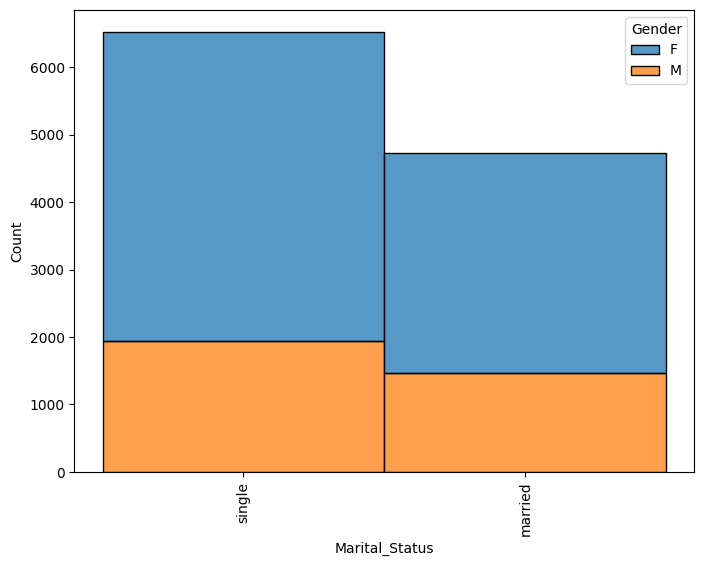

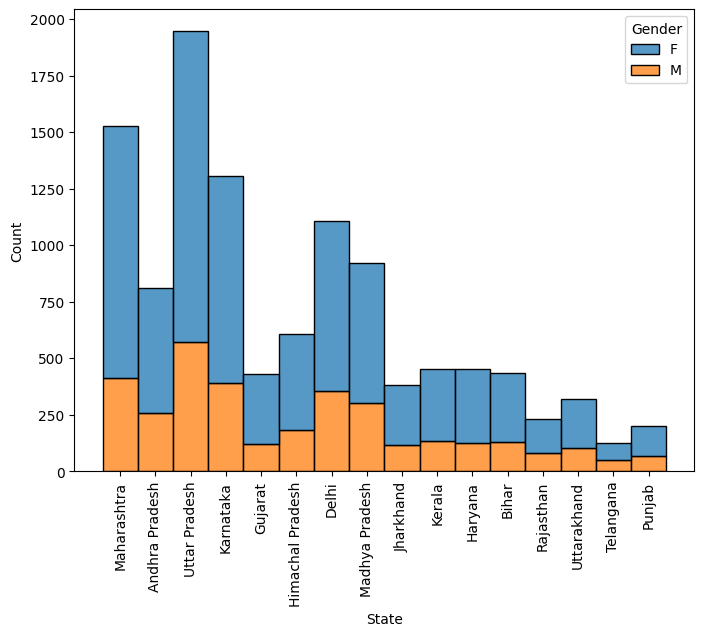

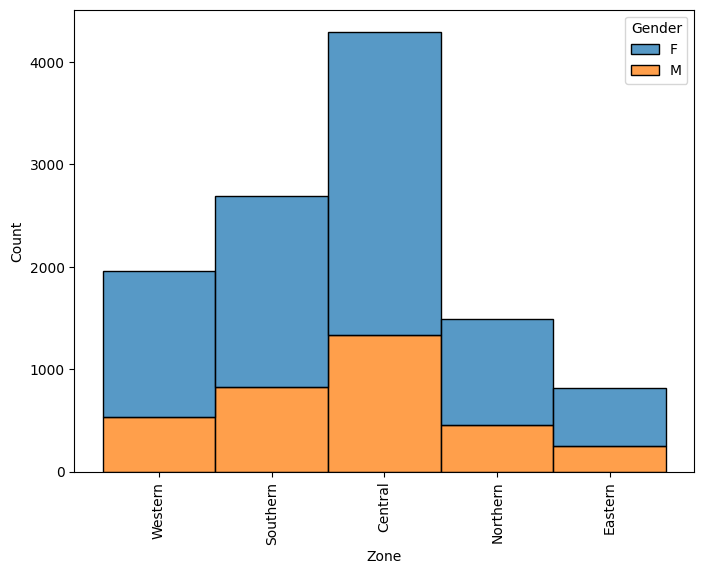

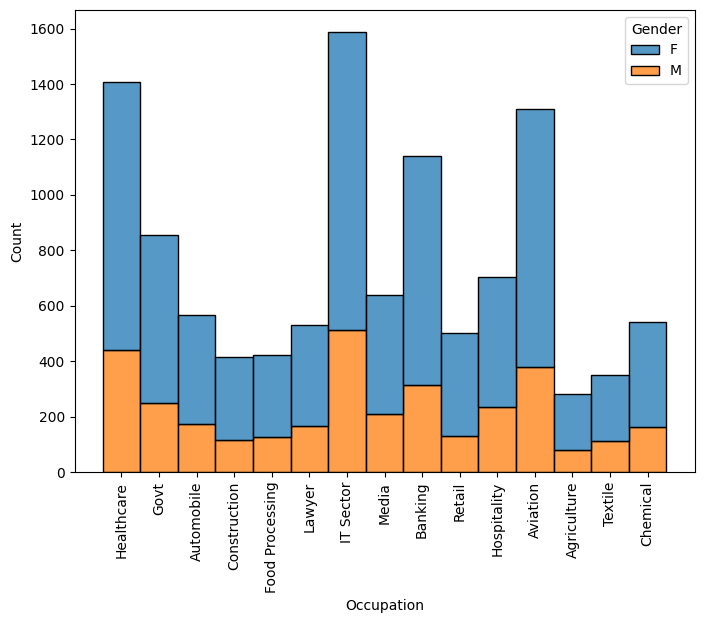

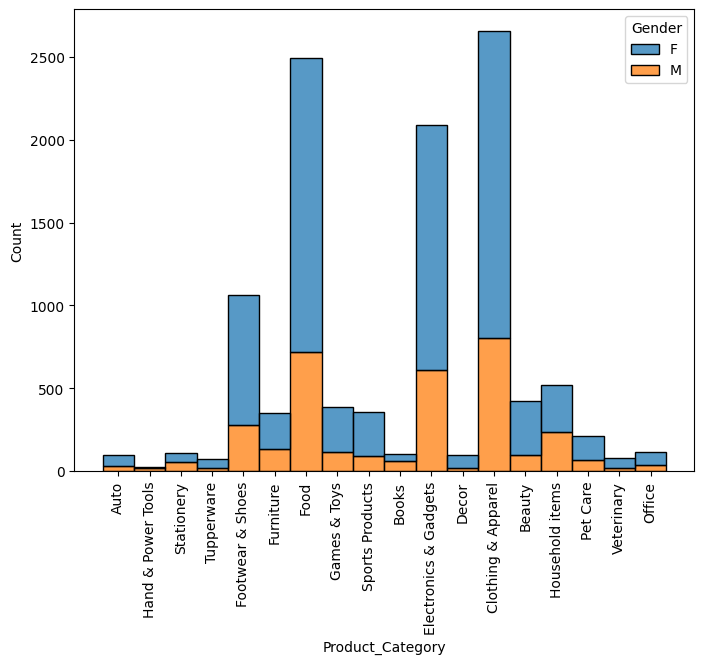

In [18]:
for i in categorical_column:
    hisplt(i)

In [19]:
def barplt(column_name):
    sns.boxplot(x = df[column_name])
    plt.show()

In [20]:
float_columns = df.select_dtypes(["int64","float64"]).columns

In [21]:
float_columns = float_columns[1:]

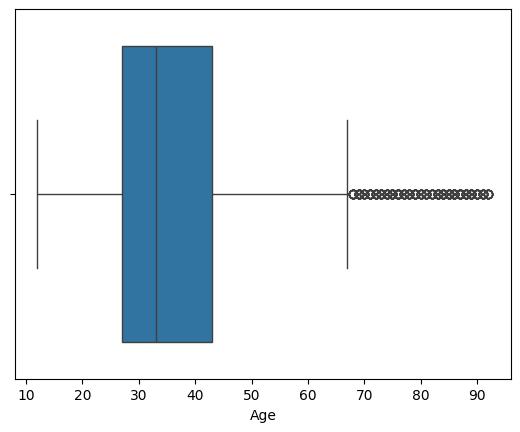

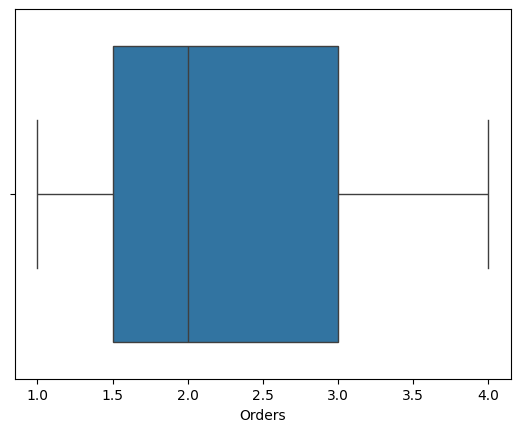

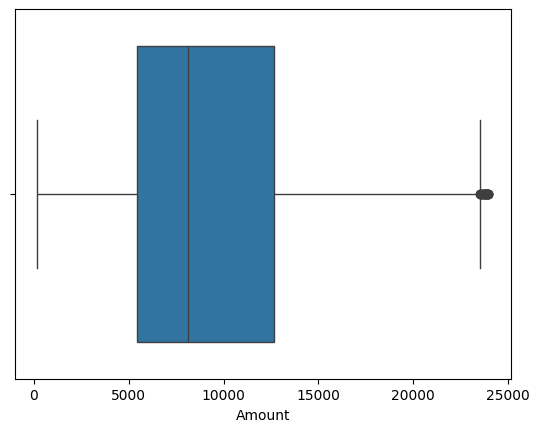

In [22]:
for i in float_columns:
    barplt(i)


In [23]:
def pi_chart(column_name):
    fig, axes = plt.subplots(1,figsize=(10, 6))
    df[column_name].value_counts().head(8).plot(subplots = True,kind = "pie",autopct = "%.2f")
    fig, axes = plt.subplots(1,figsize=(10, 6))
    df[column_name].value_counts().head(8).plot(kind = "bar")

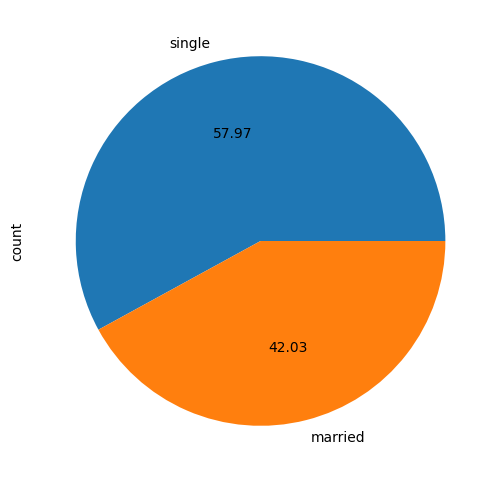

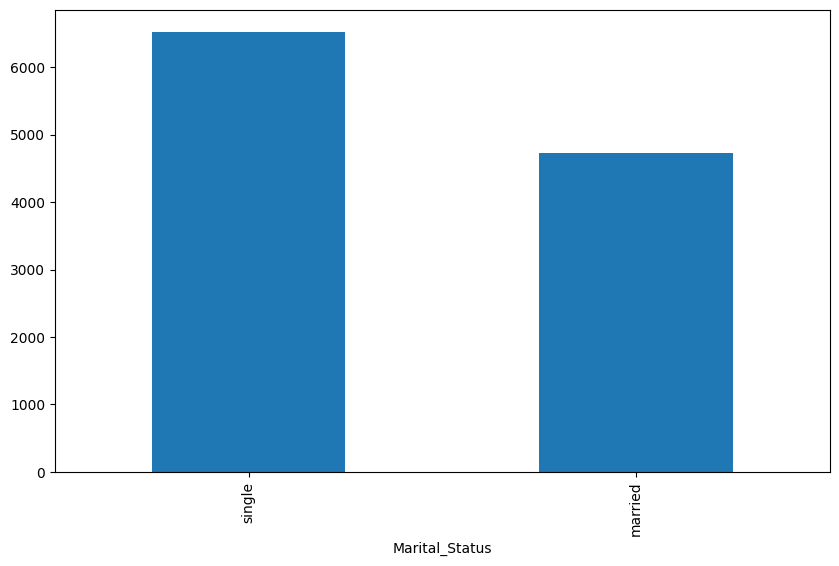

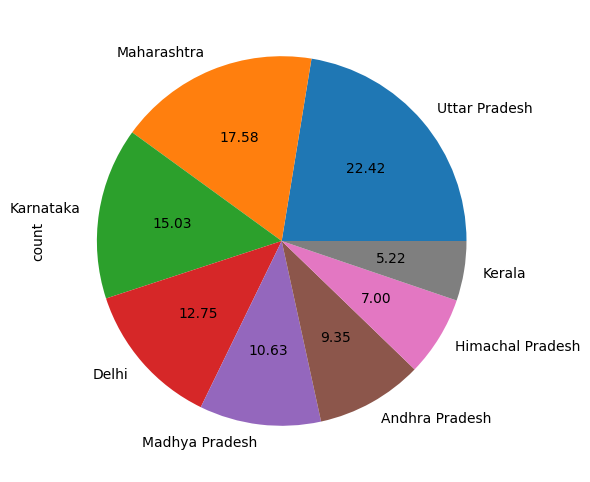

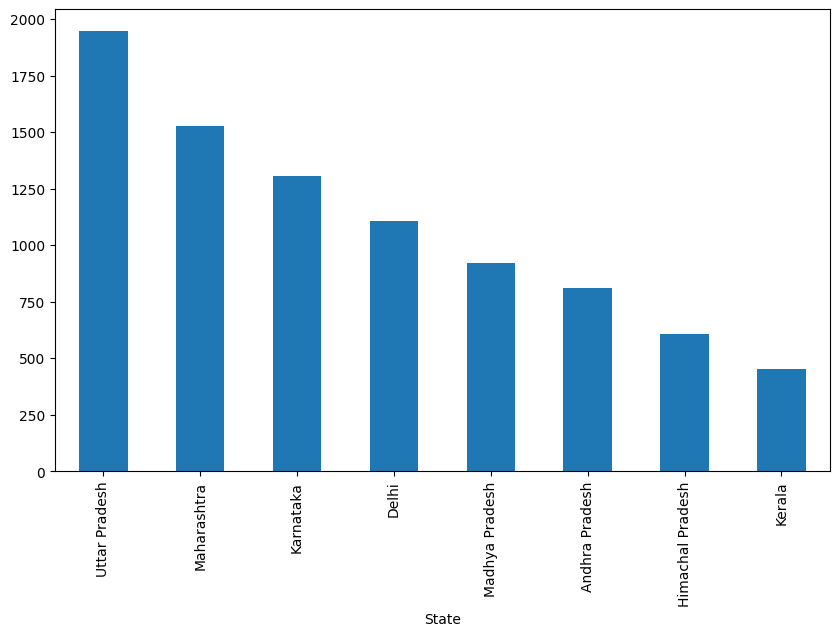

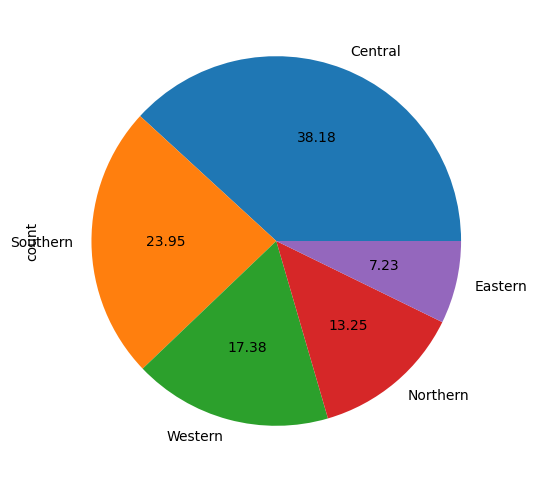

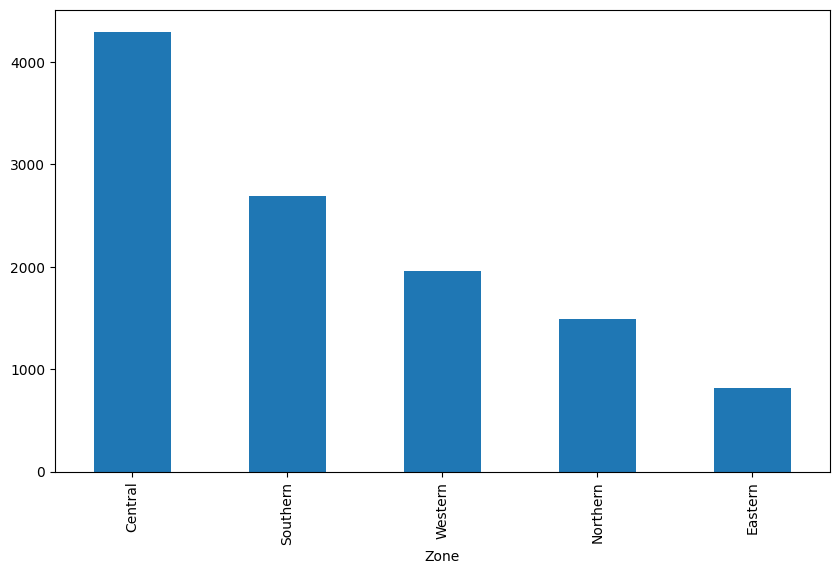

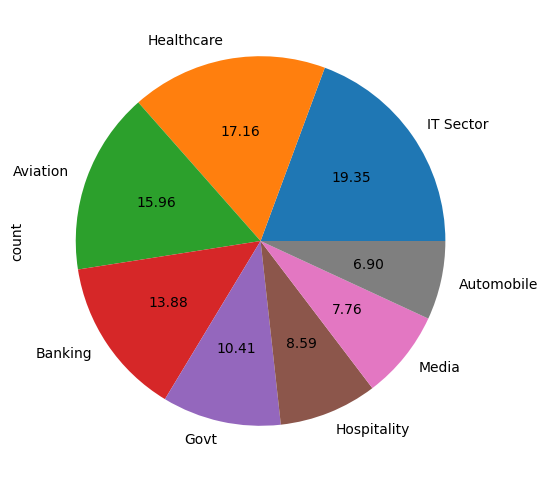

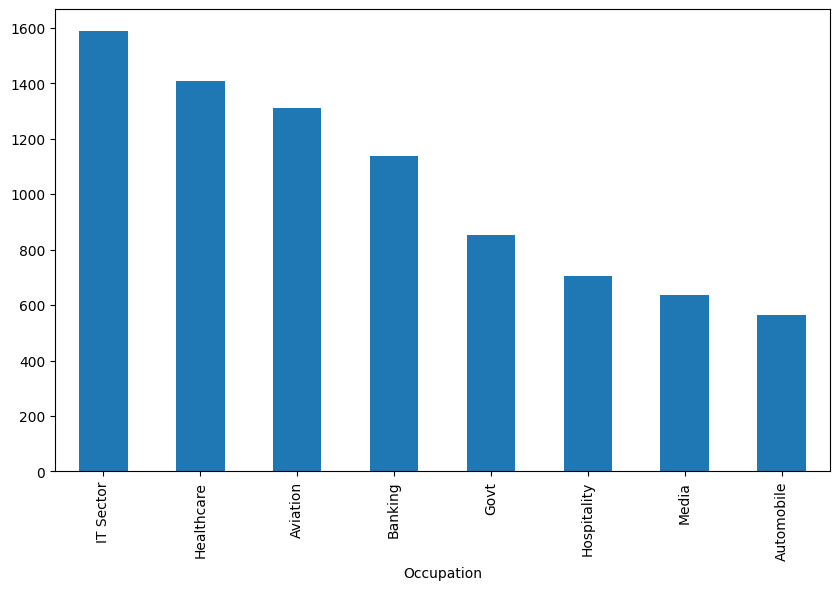

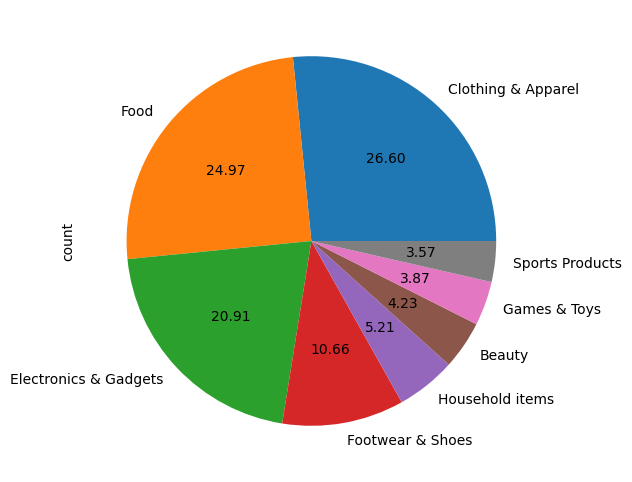

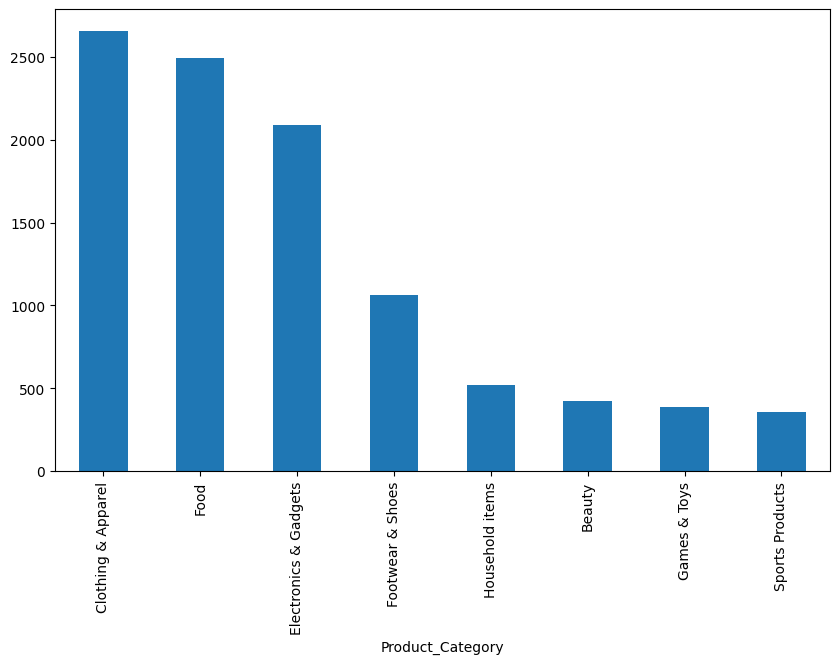

In [24]:
for i in categorical_column:
    pi_chart(i)

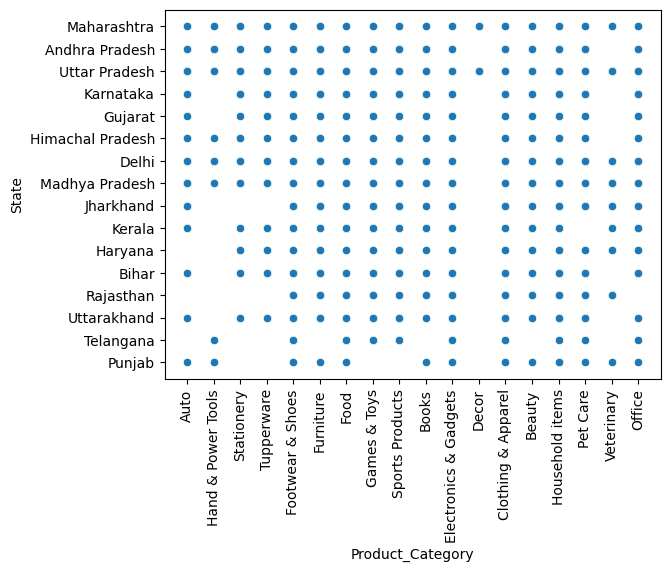

In [25]:
sns.scatterplot(x='Product_Category', y='State', data=df)
plt.xticks(rotation = "vertical")
plt.show()

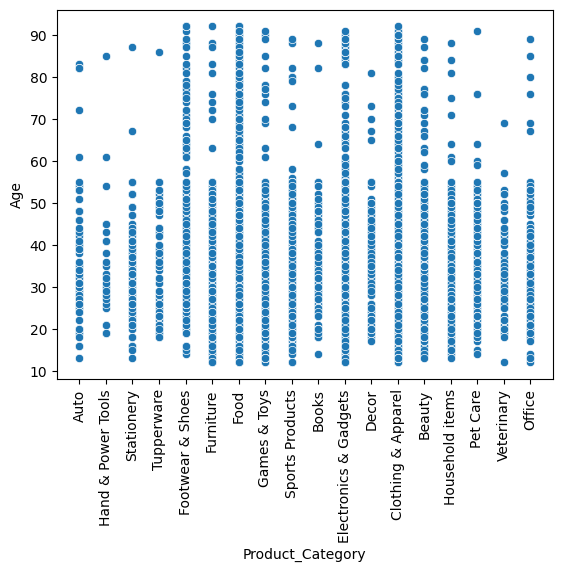

In [26]:
sns.scatterplot(x='Product_Category', y='Age', data=df)
plt.xticks(rotation = "vertical")
plt.show()

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [28]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877.0


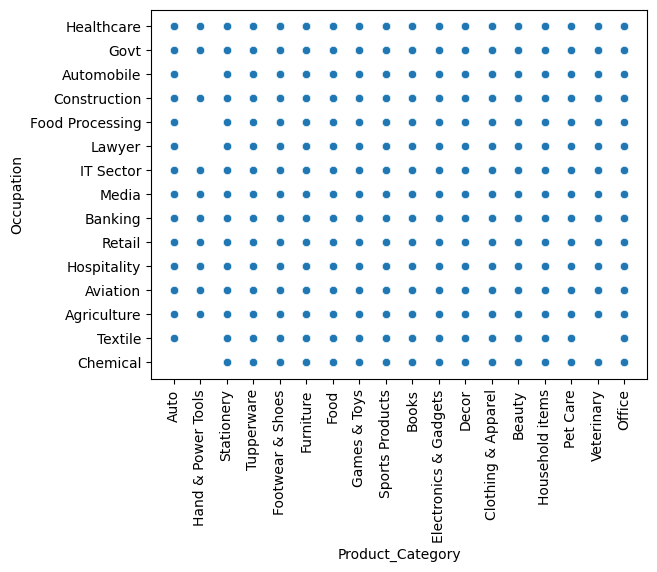

In [29]:
sns.scatterplot(x='Product_Category', y='Occupation', data=df)
plt.xticks(rotation = "vertical")
plt.show()

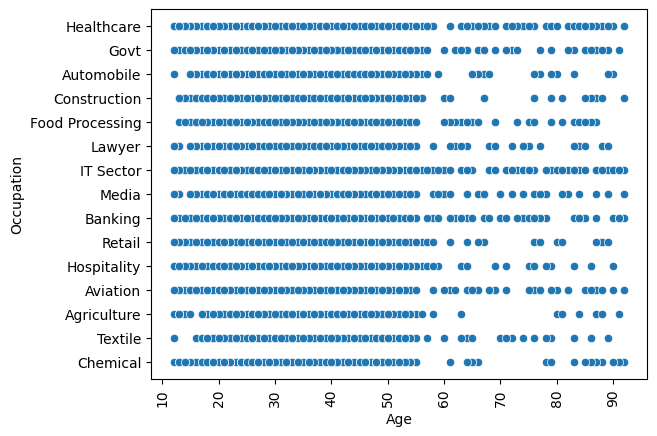

In [30]:
sns.scatterplot(y='Occupation', x='Age', data=df)
plt.xticks(rotation = "vertical")
plt.show()

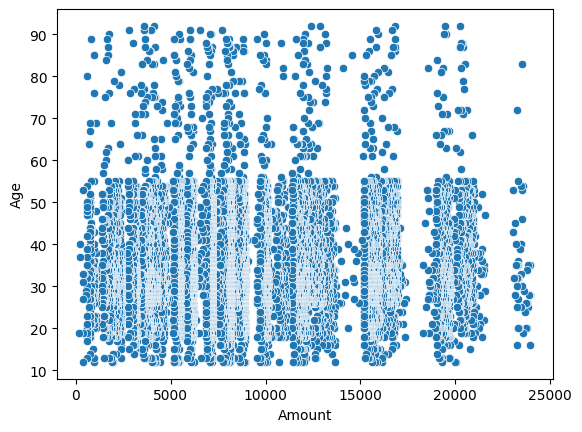

In [31]:
sns.scatterplot(x='Amount', y='Age', data=df)
plt.show()

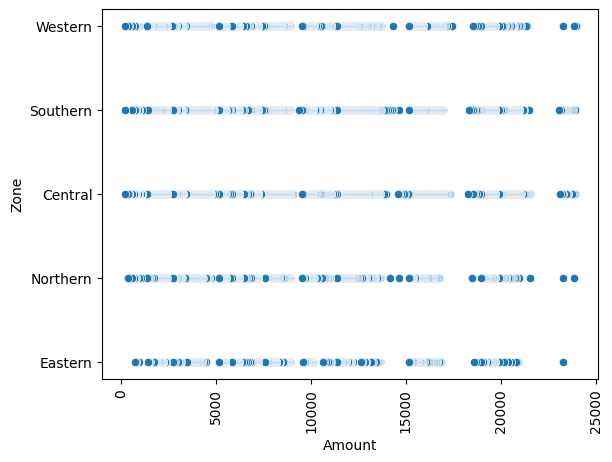

In [32]:
sns.scatterplot(y='Zone', x='Amount', data=df)
plt.xticks(rotation = "vertical")
plt.show()

In [33]:
df.corr(numeric_only=True)["Amount"].drop("User_ID")

Age       0.030908
Orders   -0.013371
Amount    1.000000
Name: Amount, dtype: float64

<Axes: title={'center': 'expense as per age'}, xlabel='Age'>

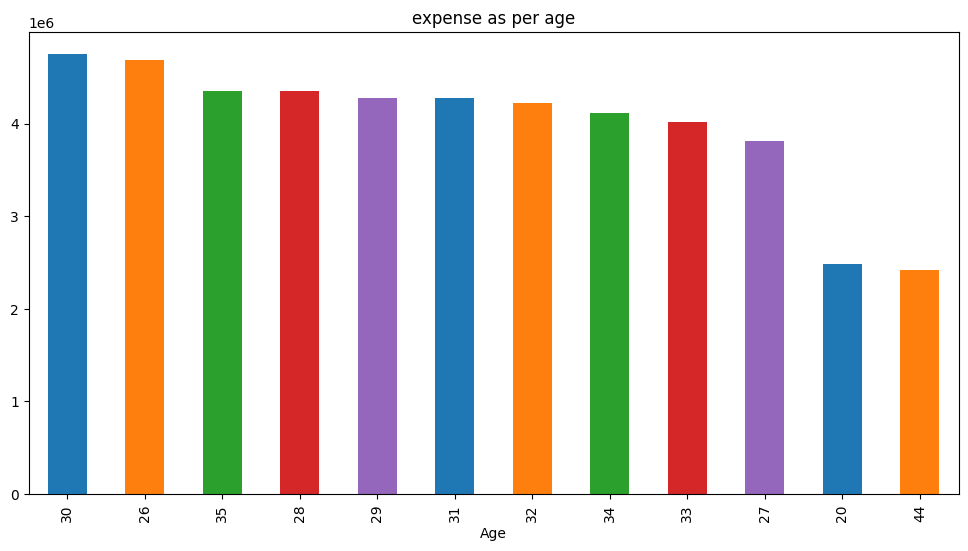

In [34]:
fig, axes = plt.subplots(1,figsize=(12, 6))
df.groupby('Age').sum("Amount")['Amount'].sort_values(ascending=False).head(12).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4','C0', 'C1', 'C2', 'C3', 'C4'],title="expense as per age")

<Axes: title={'center': 'expense as per category'}, xlabel='Product_Category'>

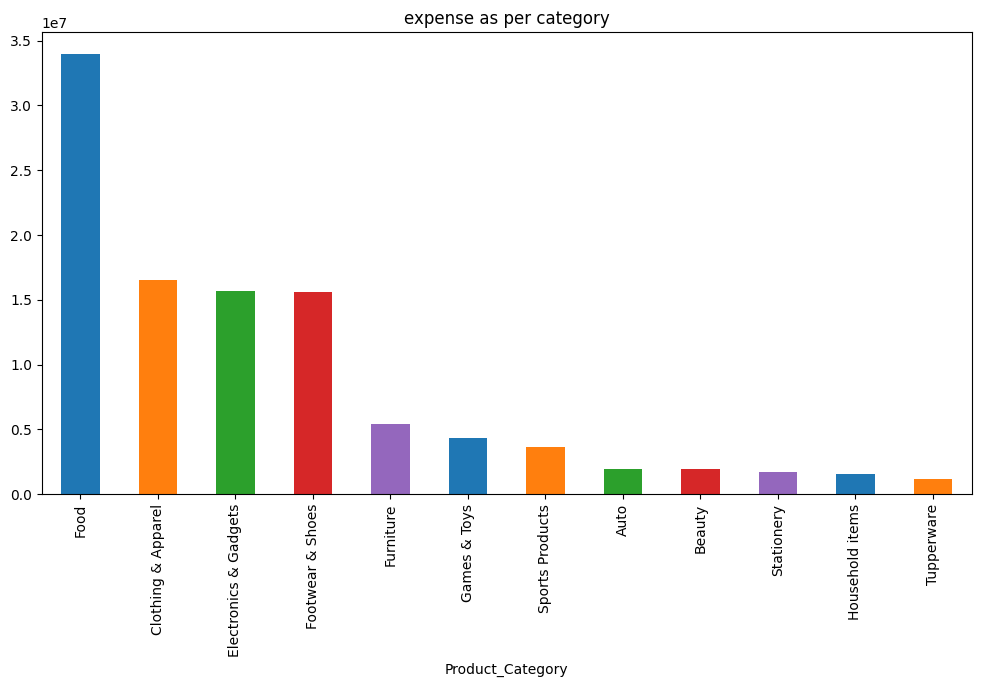

In [35]:
fig, axes = plt.subplots(1,figsize=(12, 6))
df.groupby('Product_Category').sum("Amount")['Amount'].sort_values(ascending=False).head(12).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4','C0', 'C1', 'C2', 'C3', 'C4'],title="expense as per category")

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: title={'center': 'total_sales as per service'}, xlabel='Occupation'>

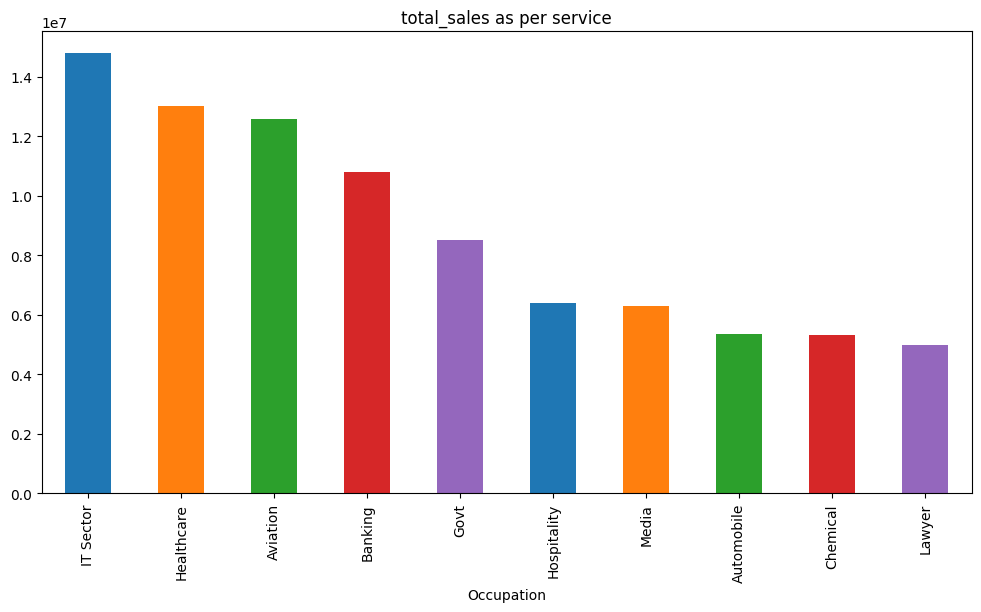

In [37]:
fig, axes = plt.subplots(1,figsize=(12, 6))
df.groupby('Occupation').sum("Amount")['Amount'].sort_values(ascending=False).head(10).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4','C0', 'C1', 'C2', 'C3', 'C4'],title="total_sales as per service")

<Axes: title={'center': 'total sales as per state'}, xlabel='State'>

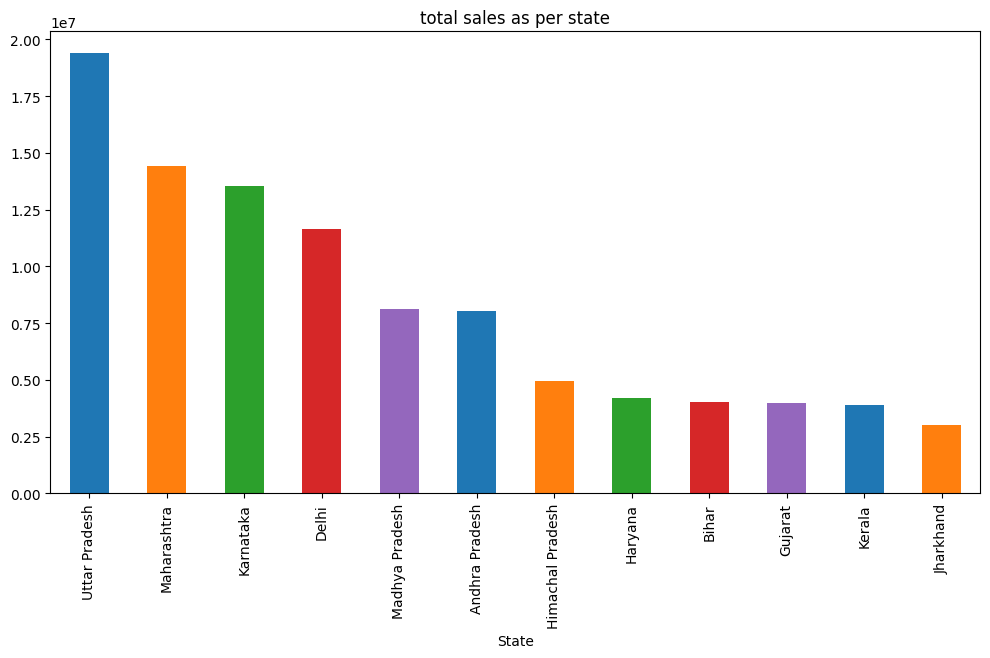

In [38]:
fig, axes = plt.subplots(1,figsize=(12, 6))
df.groupby('State').sum("Amount")['Amount'].sort_values(ascending=False).head(12).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4','C0', 'C1', 'C2', 'C3', 'C4'],title="total sales as per state")

<Axes: title={'center': 'sales as per gender basis'}, xlabel='Gender'>

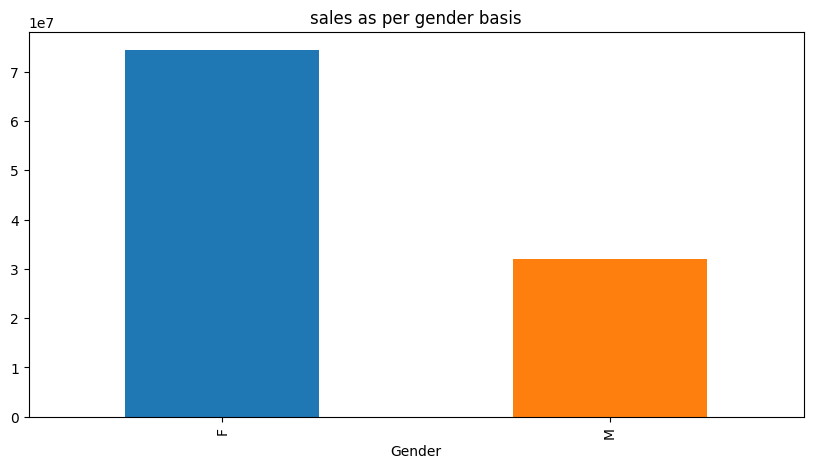

In [39]:
fig, axes = plt.subplots(1,figsize=(10, 5))
df.groupby('Gender').sum("Amount")['Amount'].sort_values(ascending=False).head(12).plot(kind='bar', color=['C0', 'C1'],title="sales as per gender basis")

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: title={'center': 'sales as per martial staus'}, xlabel='Marital_Status'>

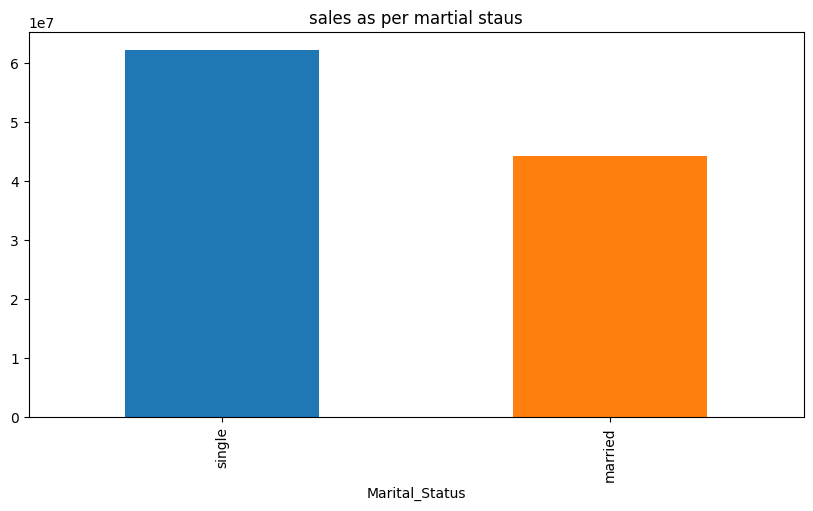

In [41]:
fig, axes = plt.subplots(1,figsize=(10,5))
df.groupby('Marital_Status').sum("Amount")['Amount'].sort_values(ascending=False).head(12).plot(kind='bar', color=['C0', 'C1'],title="sales as per martial staus")

<Axes: xlabel='State,Marital_Status'>

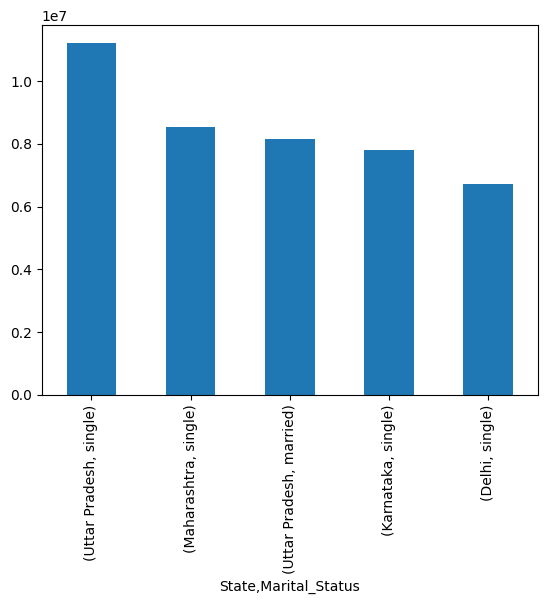

In [42]:

df.groupby(["State",'Marital_Status']).sum("Amount")["Amount"].sort_values(ascending = False).head(5).plot(kind='bar')

In [43]:

df.groupby(["State",'Marital_Status']).sum("Amount")[['Amount','Orders']].head(4)

Amount  Orders
State          Marital_Status                    
Andhra Pradesh married         3308078.79     867
               single          4732989.00    1187
Bihar          married         1738712.00     463
               single          2284045.00     599

<Axes: xlabel='State,Product_Category,Marital_Status'>

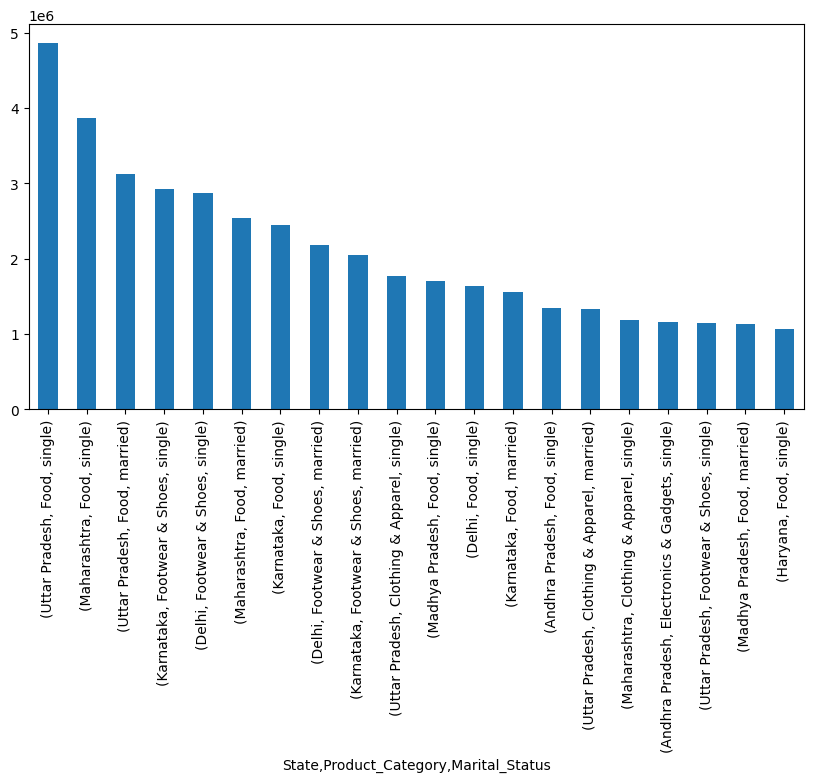

In [44]:
fig, axes = plt.subplots(1,figsize=(10,5))
df.groupby(["State","Product_Category",'Marital_Status']).sum("Amount").sort_values(by = ["Amount"],ascending=False)['Amount'].head(20).plot(kind='bar')

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877.0


<Axes: xlabel='State,Product_Category,Age Group,Gender'>

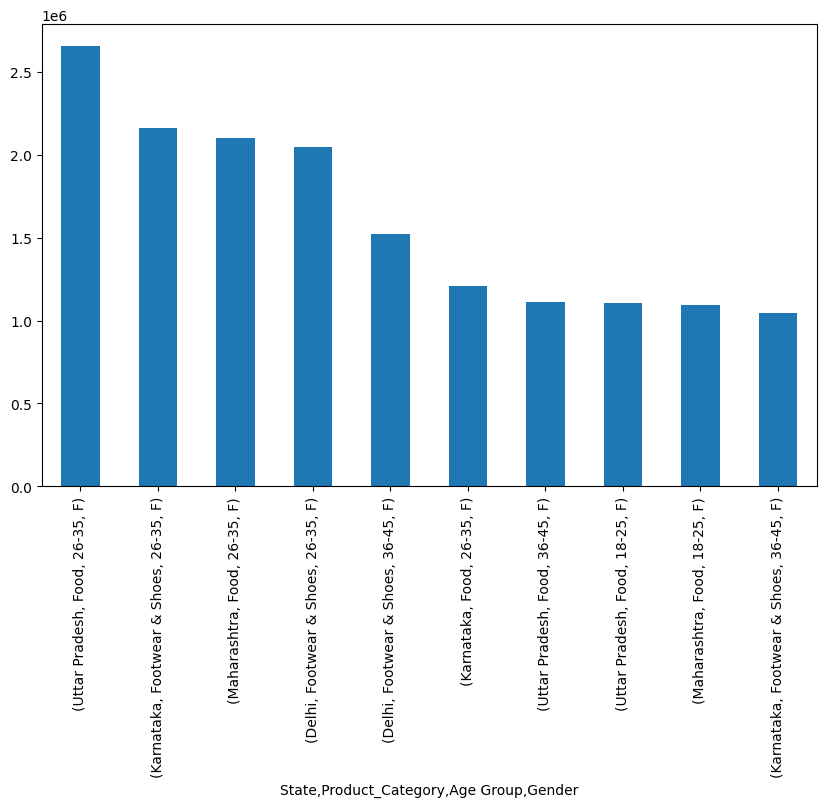

In [46]:
fig, axes = plt.subplots(1,figsize=(10,6))
df.groupby(["State","Product_Category","Age Group",'Gender']).sum("Amount").sort_values(by = ["Amount"],ascending = False)['Amount'].head(10).plot(kind='bar',stacked=True)

<Axes: xlabel='State,Occupation,Product_Category,Age Group,Gender'>

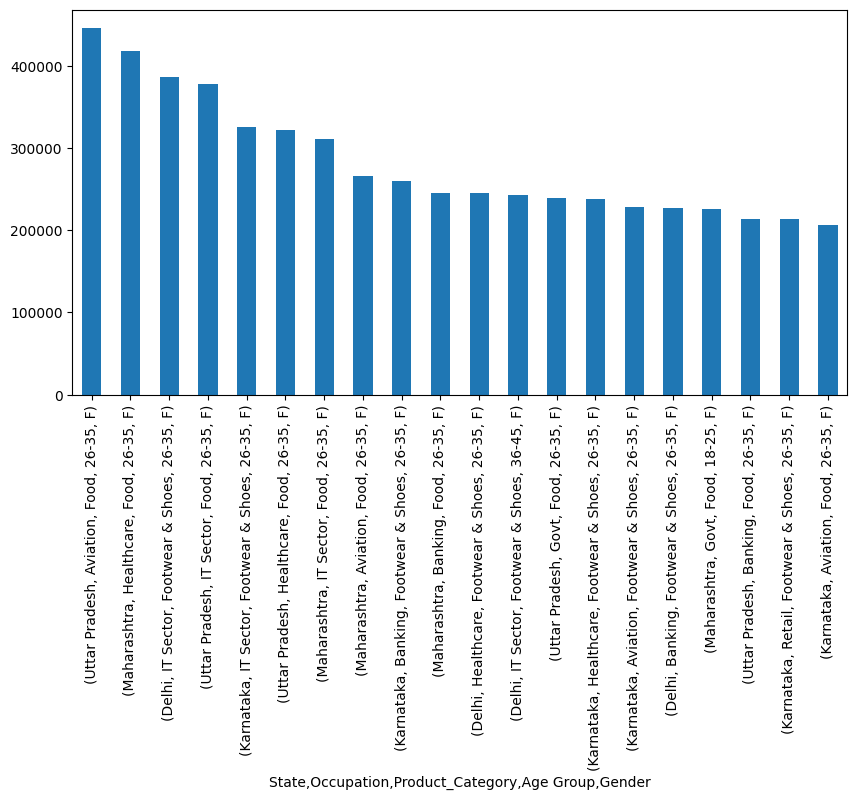

In [47]:
fig, axes = plt.subplots(1,figsize=(10,5))
df.groupby(["State","Occupation","Product_Category","Age Group",'Gender']).sum("Amount").sort_values(by = ["Amount"],ascending=False)['Amount'].head(20).plot(kind='bar',stacked = True)

<Axes: xlabel='State,Age Group,Gender'>

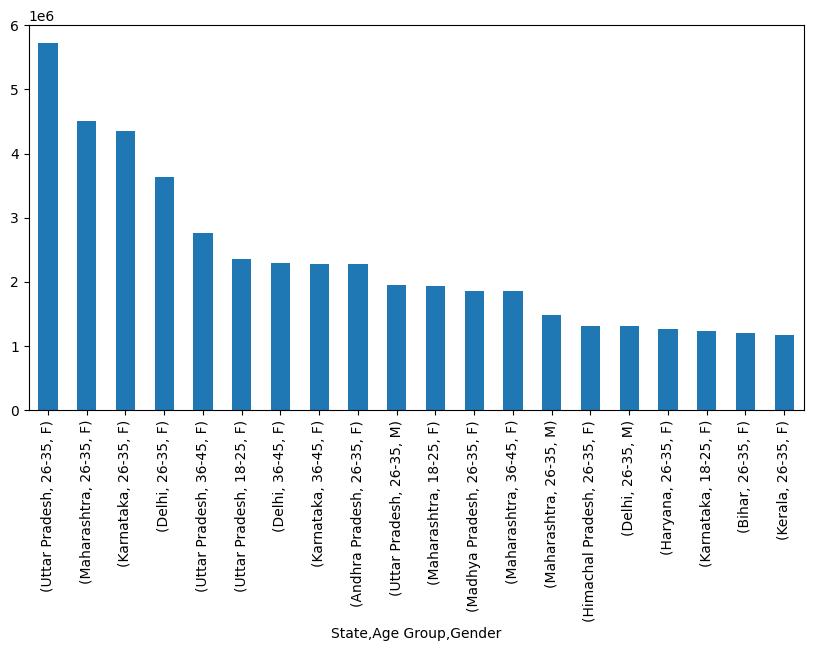

In [48]:
fig, axes = plt.subplots(1,figsize=(10,5))
df.groupby(["State","Age Group",'Gender']).sum("Amount").sort_values(by = ["Amount"],ascending=False)['Amount'].head(20).plot(kind='bar',stacked = True)